# **Brainhack Project**

# Connect with the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
path = '/content/drive/My Drive/Colab Notebooks/'
df = pd.read_csv(path + 'outputTable_forClassific.csv')

In [54]:
list(df.columns)

['Unnamed: 0',
 'LRP5L',
 'RASA4',
 'SPATA22',
 'MAEL',
 'ZNF404',
 'C1orf116',
 'HRH1',
 'DIO2',
 'CBWD6',
 'LRRC37A2',
 'glioma_name']

In [55]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,LRP5L,RASA4,SPATA22,MAEL,ZNF404,C1orf116,HRH1,DIO2,CBWD6,LRRC37A2,glioma_name
0,73,58,18,57,354,18,5757,243,123,90,1
1,71,113,15,35,299,8,403,4699,104,122,2
2,120,59,6,84,322,7,431,1341,108,370,0
3,222,504,11,81,967,36,686,3080,289,851,0
4,48,163,2,37,493,15,1532,121,105,110,1


In [56]:
df.shape

(309, 11)

# Classification

In [57]:
X = df.drop('glioma_name',axis=1).to_numpy()
y = df['glioma_name'].to_numpy()

In [148]:
from collections import Counter
el_counts = Counter(y)
el_counts

Counter({1: 144, 2: 80, 0: 85})

In [98]:
# Find the element that appears the least often
least_common_element = el_counts.most_common()[-1][0]
least_common_count = el_counts.most_common()[-1][1]

least_common_element, least_common_count

(2, 80)

# Downsample the dataset such that it's balanced
I tried it but it didn't work properly

In [123]:
from sklearn.utils import resample

# Separate the dataset into class 0, 1, and 2
X_class0 = X[y == 0]
X_class1 = X[y == 1]
X_class2 = X[y == 2]

# Downsample class 0 and class 1 to have less instances
X_class0_downsampled = resample(X_class0, n_samples=80, random_state=0)
X_class1_downsampled = resample(X_class1, n_samples=80, random_state=0)

# Combine the downsampled classes with the lowest class
X_balanced = np.vstack((X_class2, X_class0_downsampled, X_class1_downsampled))
y_balanced = np.hstack((np.ones(X_class2.shape[0])*2, np.zeros(X_class0_downsampled.shape[0]), np.ones(X_class1_downsampled.shape[0])))

# Divide into train-test
# Prepare for the classification

In [149]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.25, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# For kNN
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))


In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
#from tensorflow.keras.constraints import max_norm

In [151]:
X_train.shape

(231, 10)

In [163]:
model = Sequential()

# the number of neurons comprising that layer is equal to the number of features
# (columns) in your data. Some NN configurations add one additional node for a
# bias term
model.add(Dense(11,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))

# If the NN is a classifier, then it also has a single node unless softmax is
# used in which case the output layer has one node per class label in your model
model.add(Dense(3,activation='softmax')) # one output per class

model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam', metrics=['accuracy'])

In [154]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [164]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
8/8 [==============================] - 1s 45ms/step - loss: 1.1333 - accuracy: 0.3939 - val_loss: 1.0470 - val_accuracy: 0.5385
Epoch 2/600
8/8 [==============================] - 0s 13ms/step - loss: 1.1138 - accuracy: 0.3939 - val_loss: 1.0476 - val_accuracy: 0.5385
Epoch 3/600
8/8 [==============================] - 0s 12ms/step - loss: 1.1188 - accuracy: 0.3550 - val_loss: 1.0481 - val_accuracy: 0.5385
Epoch 4/600
8/8 [==============================] - 0s 11ms/step - loss: 1.0768 - accuracy: 0.4242 - val_loss: 1.0475 - val_accuracy: 0.5385
Epoch 5/600
8/8 [==============================] - 0s 12ms/step - loss: 1.1249 - accuracy: 0.4113 - val_loss: 1.0478 - val_accuracy: 0.5385
Epoch 6/600
8/8 [==============================] - 0s 12ms/step - loss: 1.1021 - accuracy: 0.4113 - val_loss: 1.0485 - val_accuracy: 0.5385
Epoch 7/600
8/8 [==============================] - 0s 11ms/step - loss: 1.0829 - accuracy: 0.4372 - val_loss: 1.0481 - val_accuracy: 0.5385
Epoch 8/600
8/8 [===

# Validation
Training loss - how the network fits the training data

Validation loss - to assess the performance of the network on the validation set

<Axes: >

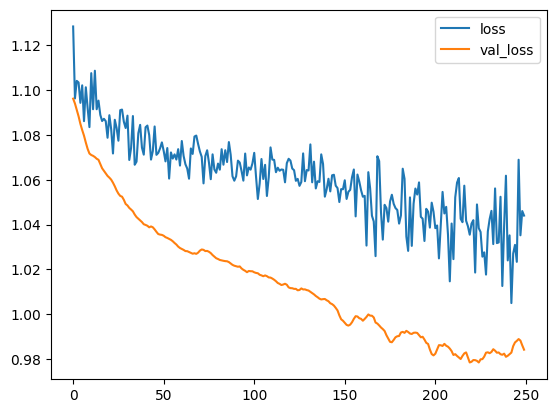

In [156]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [166]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


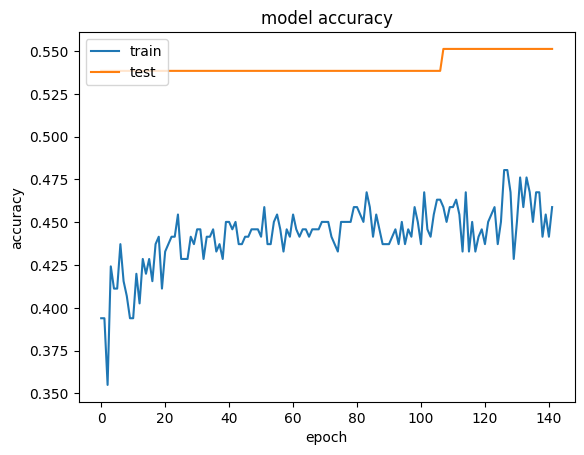

In [167]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [170]:
model.predict(X_test)[0:20]

3/3 [==============================] - 0s 4ms/step


array([[0.28255412, 0.4299476 , 0.28749824],
       [0.21460402, 0.52815896, 0.25723708],
       [0.31117055, 0.39162278, 0.29720673],
       [0.26406112, 0.45446524, 0.28147373],
       [0.15792972, 0.6093595 , 0.23271082],
       [0.31932247, 0.38081282, 0.29986468],
       [0.3159488 , 0.3842839 , 0.2997673 ],
       [0.27843994, 0.43291813, 0.28864196],
       [0.30844104, 0.39390457, 0.29765445],
       [0.29555595, 0.41113397, 0.29331008],
       [0.32838777, 0.36891863, 0.30269358],
       [0.15089265, 0.62481594, 0.22429131],
       [0.08969314, 0.741403  , 0.16890375],
       [0.32072768, 0.38041413, 0.29885814],
       [0.27634937, 0.4377944 , 0.28585628],
       [0.28370324, 0.42571038, 0.29058632],
       [0.26895985, 0.44717664, 0.2838636 ],
       [0.25174156, 0.4697943 , 0.27846417],
       [0.29710653, 0.41047436, 0.29241908],
       [0.31666923, 0.38443372, 0.29889703]], dtype=float32)

In [174]:
import numpy as np
blah = model.predict(X_test)
predictions = np.argmax(blah, axis=1)
predictions

3/3 [==============================] - 0s 3ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
from sklearn.metrics import accuracy_score

In [175]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        21
           1       0.55      1.00      0.71        42
           2       0.00      0.00      0.00        15

    accuracy                           0.55        78
   macro avg       0.52      0.35      0.27        78
weighted avg       0.56      0.55      0.40        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
print(y_test[0:20])
print(predictions[0:20])

[1 1 0 1 1 0 0 0 2 1 0 1 1 1 1 2 1 1 2 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [176]:
print(confusion_matrix(y_test,predictions))

[[ 1 20  0]
 [ 0 42  0]
 [ 0 15  0]]


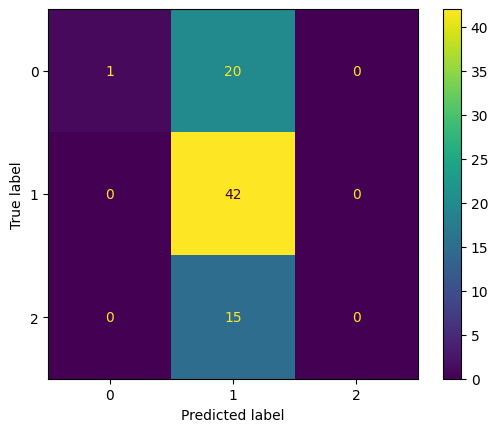

In [177]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [187]:
# Compute chance level with dummy classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.34627831715210355

# Check other classification methods

#SVM

In SVM, we tuned the hyperparameter, i.e. regularization parameter c (c = 10), and applied a linear kernel to achieve higher accuracy.

In [178]:
from sklearn.svm import SVC
model = SVC(C=10)
model.fit(X_train,y_train)


SVC(C=10)

[0 1 0 1 1 2 2 1 0 0 2 2 2 0 0 1 1 1 1 2 2 2 0 1 1 2 1 0 2 1 1 0 1 1 0 0 0
 1 1 0 1 2 1 1 0 2 0 2 2 1 2 2 1 1 2 1 0 2 1 2 1 1 2 1 1 2 2 2 0 1 0 1 2 2
 1 1 0 2]
[1 1 0 1 1 0 0 0 2 1 0 1 1 1 1 2 1 1 2 1 2 0 1 1 0 0 2 1 1 1 2 0 1 0 2 1 0
 1 0 0 2 2 1 1 1 0 0 2 1 1 1 1 1 1 2 1 0 1 0 2 1 1 0 1 0 1 1 2 1 0 1 1 1 1
 2 2 1 0]
              precision    recall  f1-score   support

           0       0.32      0.29      0.30        21
           1       0.58      0.45      0.51        42
           2       0.23      0.40      0.29        15

    accuracy                           0.40        78
   macro avg       0.37      0.38      0.37        78
weighted avg       0.44      0.40      0.41        78

[[ 6  7  8]
 [11 19 12]
 [ 2  7  6]]


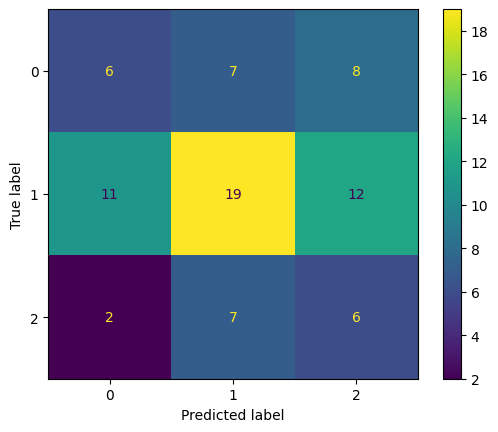

In [185]:
model.predict(X_test)[0:20]

import numpy as np
predictions_svm = model.predict(X_test)
print(predictions_svm)
print(y_test)

print(classification_report(y_test,predictions_svm))
print(confusion_matrix(y_test,predictions_svm))

cm = confusion_matrix(y_test,predictions_svm)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

# Random Forest

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# GNB